In [1]:
import pandas as pd

classes =  [(0, 500),
            (500, 6000)]

dataset = pd.read_csv('resources/mobile.csv', sep='\t', encoding='windows-1251')
price = dataset[['Среднемесячный расход']]
categories = []
doneFlag = False
for _, x in price.iterrows():
    for i, c in enumerate(classes):

        if c[0] <= x['Среднемесячный расход'] < c[1]:
            categories.append(i)
            breakFlag = True
            break

    if doneFlag:
        continue
dataset['Категория цены'] = categories

In [2]:
dataset.describe()

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Категория цены
count,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000
mean,2294.630677,41.894924,506.155512,4.227571,63.859751,70.347729,6.273152,8.661175,0.394034,10.331701,21.243321,0.316563
std,1325.224451,13.077254,646.252023,3.002179,62.773427,41.222023,14.713034,13.478042,1.171980,9.222693,27.911864,0.465187
min,0.000000,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1147.750000,31.000000,152.880000,2.075000,37.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,2297.500000,43.000000,316.960000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000,0.000000
75%,3443.250000,52.000000,600.032500,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000,1.000000
max,4590.000000,70.000000,5142.760000,20.000000,500.000000,160.000000,110.000000,88.000000,12.000000,60.000000,179.000000,1.000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Код                                    4492 non-null   int64  
 1   Возраст                                4492 non-null   int64  
 2   Среднемесячный расход                  4492 non-null   float64
 3   Средняя продолжительность разговоров   4492 non-null   float64
 4   Звонков днем за месяц                  4492 non-null   int64  
 5   Звонков вечером за месяц               4492 non-null   int64  
 6   Звонков ночью за месяц                 4492 non-null   int64  
 7   Звонки в другие города                 4492 non-null   int64  
 8   Звонки в другие страны                 4492 non-null   int64  
 9   Доля звонков на стационарные телефоны  4492 non-null   int64  
 10  Количество SMS за месяц                4492 non-null   int64  
 11  Кате

Меньше 500: 3070
500 и более: 1422
Пропорция: 2.16 к 1


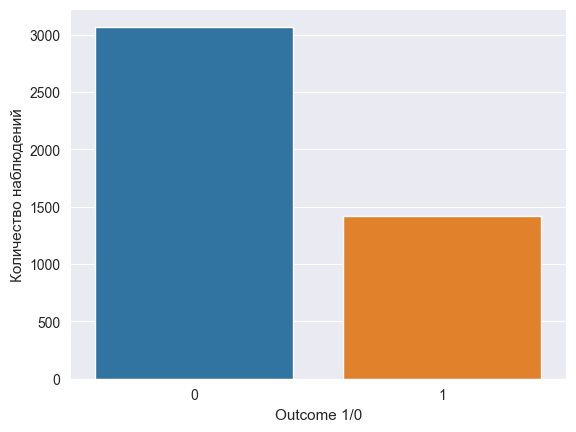

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка баланса выходной переменной
target_count = dataset['Категория цены'].value_counts()
print('Меньше 500:', target_count[0])
print('500 и более:', target_count[1])
print('Пропорция:', round(target_count[0] / target_count[1], 2), 'к 1')

sns.countplot(dataset[['Категория цены']], x='Категория цены')
plt.xlabel('Outcome 1/0',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

In [9]:
# андерсэмплинг по алгоритму tomeklinks
from imblearn.under_sampling import TomekLinks

X = dataset[dataset.columns.drop(labels='Категория цены')]
y = dataset[['Категория цены']]

In [10]:
sampler = TomekLinks(sampling_strategy='majority')
X1, y1 = sampler.fit_resample(X, y)
undersampled_dataset = pd.concat([X1, y1], axis=1)
undersampled_dataset.shape

(4484, 12)

In [11]:
# Проверка баланса выходной переменной
# сделали процедуру, чтобы не писать одно и тоже 23424503450245987 раз
def check_balance(df):
    target_count = df['Категория цены'].value_counts()
    print('Меньше 500:', target_count[0])
    print('500 и более:', target_count[1])
    print('Пропорция:', round(target_count[0] / target_count[1], 2), 'к 1')

    sns.countplot(df[['Категория цены']], x='Категория цены')
    plt.xlabel('Классы',fontsize=11)
    plt.ylabel('Количество наблюдений',fontsize=11)
    plt.show()

Меньше 500: 3062
500 и более: 1422
Пропорция: 2.15 к 1


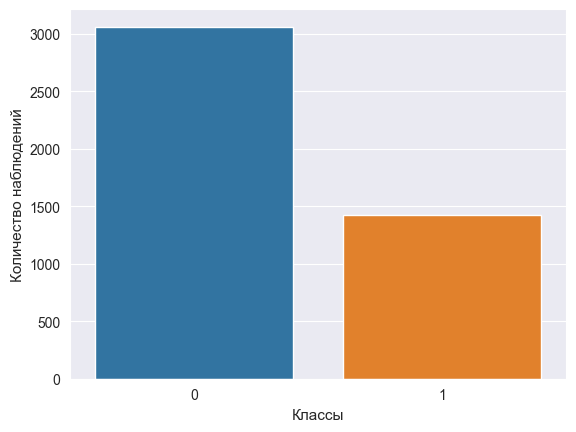

In [12]:
check_balance(undersampled_dataset)

In [19]:
sampler = TomekLinks(sampling_strategy='all')
X1, y1 = sampler.fit_resample(X, y)
undersampled_dataset = pd.concat([X1, y1], axis=1)
undersampled_dataset.shape

(4476, 12)

Меньше 500: 3062
500 и более: 1414
Пропорция: 2.17 к 1


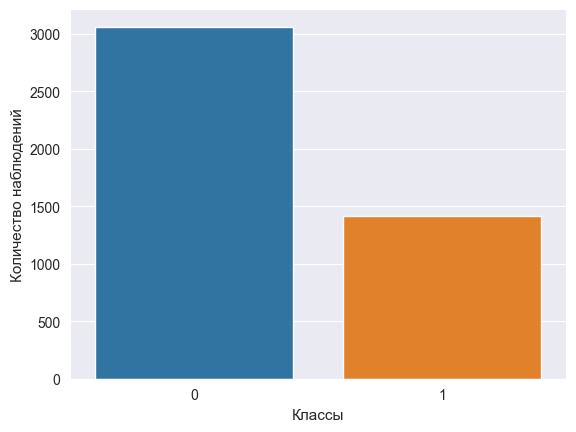

In [20]:
check_balance(undersampled_dataset)

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
df_new_oversampled=pd.concat([X_sm, y_sm], axis=1)

Меньше 500: 3070
500 и более: 3070
Пропорция: 1.0 к 1


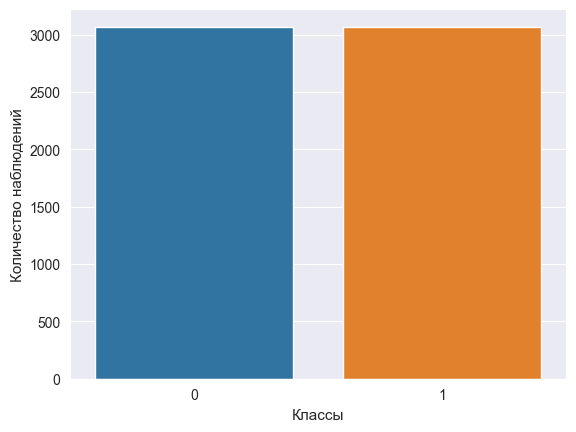

In [16]:
check_balance(df_new_oversampled)

In [30]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy='all')
X_res, y_res = rus.fit_resample(X, y)
df_new_oversampled = pd.concat([X_sm, y_sm], axis=1)

Меньше 500: 3070
500 и более: 3070
Пропорция: 1.0 к 1


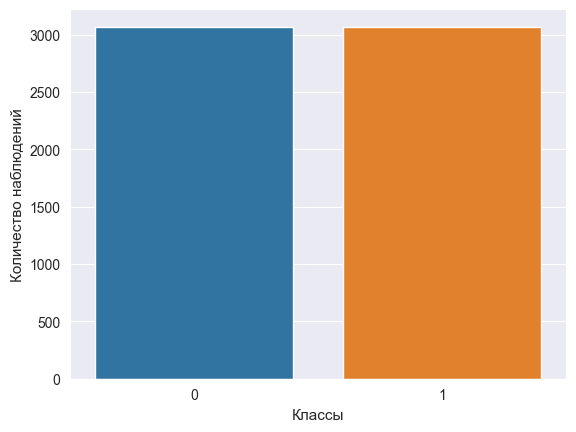

In [31]:
check_balance(df_new_oversampled)